## Analise exploratória preliminar dos dados de Heart Diseases. 

Dados disponíveis em: https://archive.ics.uci.edu/dataset/45/heart+disease

In [1]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  

print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

### Variáveis Dataset (input X)

In [2]:
# variable information 
for i in heart_disease.variables['name']:
    print(i)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
num


## Caracterização dos dados

- cálculo das medidas de Localização

- Medidas de Dispersão

- Medidas de Forma e Distribuição

Variáveis Numericas:

    - Age: idade

    - trestbps: pressao sanguinea repouso

    - chol: colesterol

    - thalach: Maxima taxa de Batimento Cardiacos

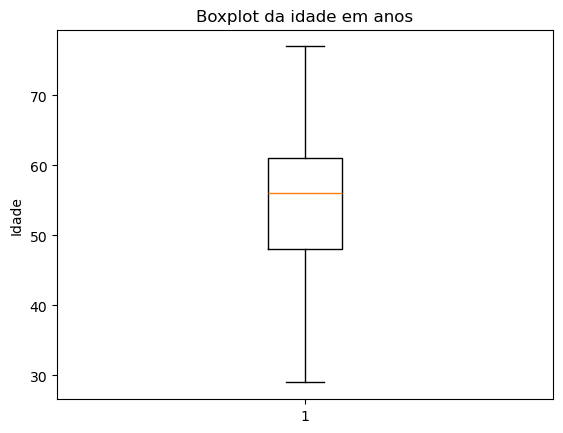

In [3]:
plt.boxplot(X['age'])
plt.title('Boxplot da idade em anos')
plt.ylabel('Idade')
plt.show()

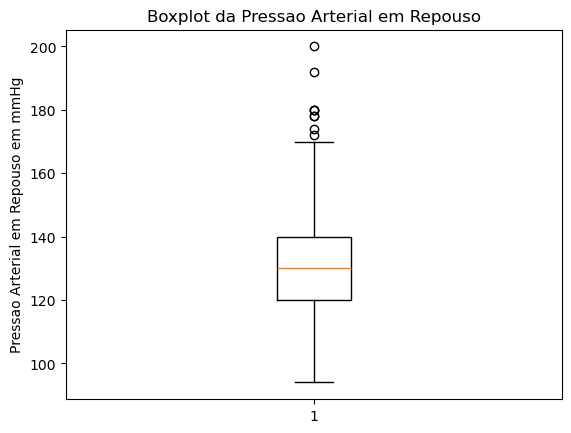

In [4]:
plt.boxplot(X['trestbps'])
plt.title('Boxplot da Pressao Arterial em Repouso') 
plt.ylabel('Pressao Arterial em Repouso em mmHg')
plt.show()

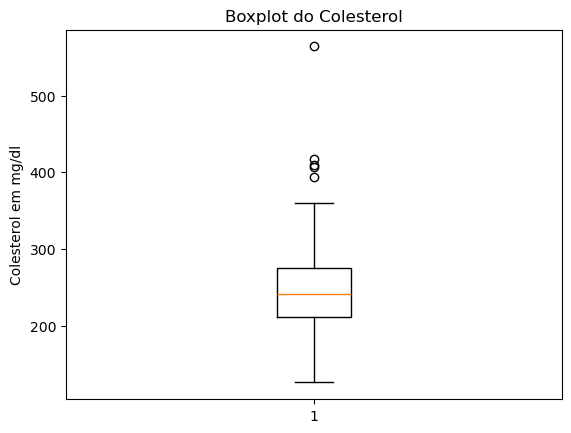

In [5]:
plt.boxplot(X['chol'])
plt.title('Boxplot do Colesterol')
plt.ylabel('Colesterol em mg/dl')
plt.show()

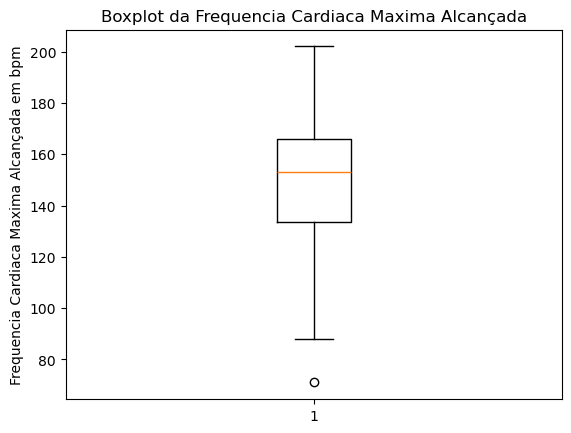

In [9]:
plt.boxplot(X['thalach'])
plt.title('Boxplot da Frequencia Cardiaca Maxima Alcançada')
plt.ylabel('Frequencia Cardiaca Maxima Alcançada em bpm')
plt.show()

In [ ]:
print("Resumo Estatístico das Variáveis Numéricas:")
print(X.describe())
print("\nDistribuição das Variáveis Categóricas:")
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for var in categorical_vars:
    print(f"\n{var}:\n{X[var].value_counts()}")
print(X.head())
print(y.head())      

Resumo Estatístico das Variáveis Numéricas:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.60066

Correlação entre as variáveis numéricas:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.362605  0.093185  0.233214  0.098773  0.119000  0.145478   
thal      0.127389  0.3

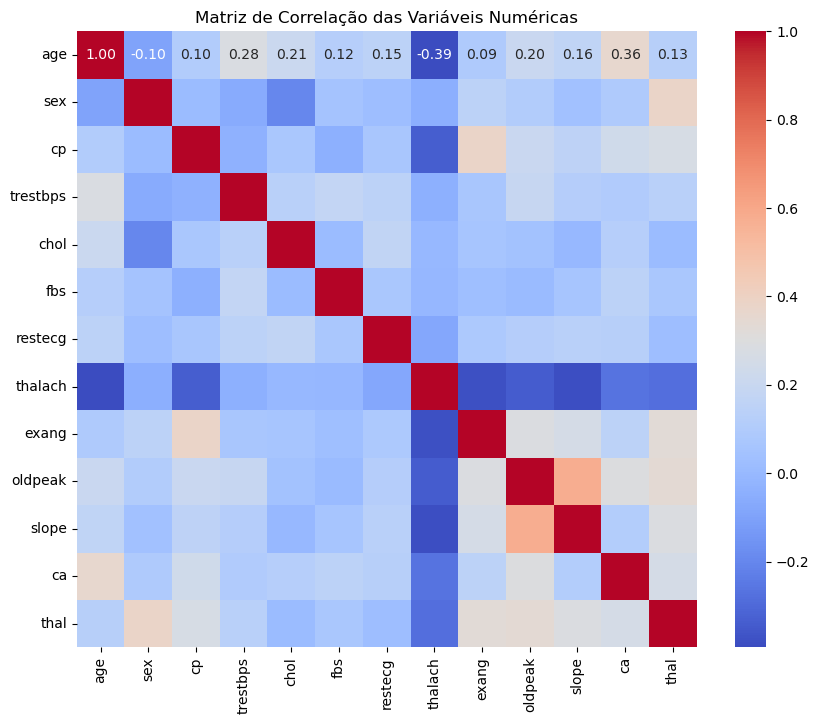

In [13]:

print("Correlação entre as variáveis numéricas:")
corr = X.corr()
print(corr)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

In [15]:
print("Tratamento de valores ausentes:")    
print(X.isnull().sum())
# Verificando valores ausentes
X = X.fillna(X.median())
print("Após o tratamento, valores ausentes:")
print(X.isnull().sum())
print("Após o tratamento, valores ausentes:")
        

Tratamento de valores ausentes:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64
Após o tratamento, valores ausentes:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
Após o tratamento, valores ausentes:


Analise PCA - Componentes Principais


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]

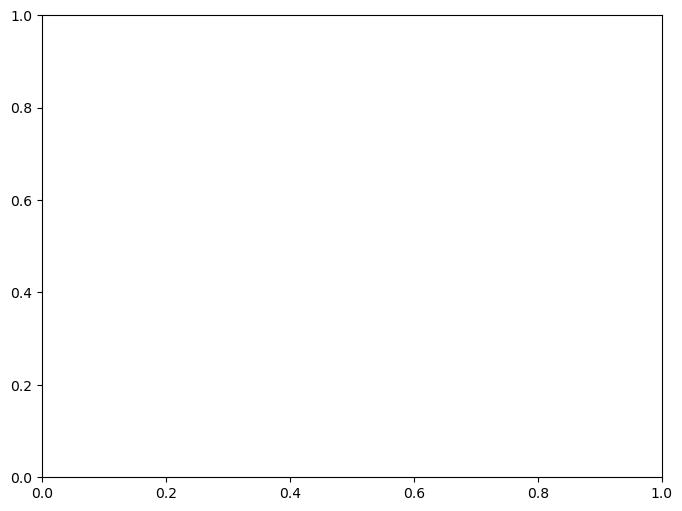

In [16]:
print("Analise PCA - Componentes Principais")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA - Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Target')
plt.show()